In [2]:
# !pip install xgboost

In [1]:
## package 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

In [2]:
import os

In [3]:
main_dir = r'C:\Users\Mehdi\OneDrive\Bureau\mspr_data\excel_files'
os.chdir(main_dir)
print("Current Working Directory:", os.getcwd())

Current Working Directory: C:\Users\Mehdi\OneDrive\Bureau\mspr_data\excel_files


In [4]:
## Import Data

## Election 
resultats_elections_france = r'donnee_resultats_elections_france.xlsx'
df_resultats_elections_france = pd.read_excel(resultats_elections_france)


## région & département
# df_anciennes_nouvelles_regions = pd.read_csv(r'C:/Users/fnour/Documents/Projet_data/DATA/anciennes-nouvelles-regions.csv',sep=';' ,encoding='latin1')

## socioprofessionnelle
socioprofessionnelle = r'donnée_socioprofessionnelle_2020.xlsx'
df_socioprofessionnelle = pd.read_excel(socioprofessionnelle)

## securité
df_securite_geographique = pd.read_csv('donnee_securite_geographie.csv', sep = ';', encoding = 'latin1')

## densité pop
densite_population = r'Donnée_densité_population.xlsx'
df_densite_population = pd.read_excel(densite_population)

## Chomage
taux_chomage = r'Donnee_taux_chomage.xlsx'
df_taux_chomage = pd.read_excel(taux_chomage)

## revenu 
revenu_fiscal_moyen = r'Donnee_revenu_fiscal_moyen.xlsx'
df_revenu_fiscal_moyen = pd.read_excel(revenu_fiscal_moyen)

## age & sexe
age_sexe = r'donnee_age_sexe_2019.xlsx'
df_age_sexe = pd.read_excel(age_sexe)


## partie politique
# partie_politique = r'partie_politique.xlsx'
# df_partie_politique = pd.read_excel(partie_politique)

In [5]:
# df_resultats_elections_france.head()
# df_socioprofessionnelle.head()
# df_securite_geographique.head()
# df_densite_population.head()
# df_taux_chomage.head()
# df_revenu_fiscal_moyen.head()
# df_age_sexe.head()

In [6]:
## nettoyage 
## Election 
## rename columns 
df_resultats_elections_france.columns = ['Code_du_département','Libellé_du_département','Code_de_la_circonscription','Libellé_de_la_circonscription','Code_de_la_commune','Libellé_de_la_commune','Code_du_b.vote','Inscrits','Abstentions','Pr_Abs_Ins','Votants','Pr_Vot_Ins','Blancs','Pr_Blancs_Ins','Pr_Blancs_Vot',
'Nuls','Pr_Nuls_Ins','Pr_Nuls_Vot','Exprimés','Pr_Exp_Ins','Pr_Exp_Vot','N°Panneau_Arthaud_Nathalie','Sexe_Arthaud_Nathalie','Nom_Arthaud_Nathalie','Prénom_Arthaud_Nathalie','Voix_Arthaud_Nathalie','Pr_Voix_Ins_Arthaud_Nathalie',
'Pr_Voix_Exp_Arthaud_Nathalie','N°Panneau_Roussel_Fabien','Sexe_Roussel_Fabien','Nom_Roussel_Fabien','Prénom_Roussel_Fabien','Voix_Roussel_Fabien','Pr_Voix_Ins_Roussel_Fabien','Pr_Voix_Exp_Roussel_Fabien','N°Panneau_Emmanuel_Macron','Sexe_Emmanuel_Macron','Nom_Emmanuel_Macron',
'Prénom_Emmanuel_Macron','Voix_Emmanuel_Macron','Pr_Voix_Ins_Emmanuel_Macron','Pr_Voix_Exp_Emmanuel_Macron','N°Panneau_Lassalle_Jean','Sexe_Lassalle_Jean','Nom_Lassalle_Jean','Prénom_Lassalle_Jean','Voix_Lassalle_Jean','Pr_Voix_Ins_Lassalle_Jean','Pr_Voix_Exp_Lassalle_Jean',
'N°Panneau_Le_Pen_Marine','Sexe_Le_Pen_Marine','Nom_Le_Pen_Marine','Prénom_Le_Pen_Marine','Voix_Le_Pen_Marine','Pr_Voix_Ins_Le_Pen_Marine','Pr_Voix_Exp_Le_Pen_Marine','N°Panneau_Zemmour_Eric','Sexe_Zemmour_Eric','Nom_Zemmour_Eric','Prénom_Zemmour_Eric',
'Voix_Zemmour_Eric','Pr_Voix_Ins_Zemmour_Eric','Pr_Voix_Exp_Zemmour_Eric','N°Panneau_Jean_Luc_Mélenchon','Sexe_Jean_Luc_Mélenchon','Nom_Jean_Luc_Mélenchon','Prénom_Jean_Luc_Mélenchon','Voix_Jean_Luc_Mélenchon','Pr_Voix_Ins_Jean_Luc_Mélenchon','Pr_Voix_Exp_Jean_Luc_Mélenchon',
'N°Panneau_Hidalgo_Anne','Sexe_Hidalgo_Anne','Nom_Hidalgo_Anne','Prénom_Hidalgo_Anne','Voix_Hidalgo_Anne','Pr_Voix_Ins_Hidalgo_Anne','Pr_Voix_Exp_Hidalgo_Anne','N°Panneau_Jadot_Yannick','Sexe_Jadot_Yannick','Nom_Jadot_Yannick','Prénom_Jadot_Yannick',
'Voix_Jadot_Yannick','Pr_Voix_Ins_Jadot_Yannick','Pr_Voix_Exp_Jadot_Yannick','N°Panneau_Valerie_Pecresse','Sexe_Valerie_Pecresse','Nom_Valerie_Pecresse','Prénom_Valerie_Pecresse','Voix_Valerie_Pecresse','Pr_Voix_Ins_Valerie_Pecresse','Pr_Voix_Exp_Valerie_Pecresse','N°Panneau_Philippe_Poutou',
'Sexe_Philippe_Poutou','Nom_Philippe_Poutou','Prénom_Philippe_Poutou','Voix_Philippe_Poutou','Pr_Voix_Ins_Philippe_Poutou','Pr_Voix_Exp_Philippe_Poutou','N°Panneau_Dupont_Aignan_Nicolas','Sexe_Dupont_Aignan_Nicolas','Nom_Dupont_Aignan_Nicolas','Prénom_Dupont_Aignan_Nicolas','Voix_Dupont_Aignan_Nicolas','Pr_Voix_Ins_Dupont_Aignan_Nicolas',
'Pr_Voix_Exp_Dupont_Aignan_Nicolas']
## select columns 
df_resultats_elections_france_global= df_resultats_elections_france[['Code_du_département',
       'Inscrits', 'Abstentions', 'Pr_Abs_Ins' , 'Votants','Pr_Vot_Ins','Blancs','Pr_Blancs_Ins','Pr_Blancs_Vot'
,'Nuls','Pr_Nuls_Ins','Pr_Nuls_Vot','Exprimés','Pr_Exp_Ins','Pr_Exp_Vot' , 
'Pr_Voix_Ins_Arthaud_Nathalie','Pr_Voix_Ins_Roussel_Fabien','Pr_Voix_Ins_Emmanuel_Macron', 'Pr_Voix_Ins_Lassalle_Jean', 'Pr_Voix_Ins_Le_Pen_Marine','Pr_Voix_Ins_Zemmour_Eric','Pr_Voix_Ins_Jean_Luc_Mélenchon','Pr_Voix_Ins_Hidalgo_Anne',
'Pr_Voix_Ins_Jadot_Yannick' , 'Pr_Voix_Ins_Valerie_Pecresse' , 'Pr_Voix_Ins_Philippe_Poutou' , 'Pr_Voix_Ins_Dupont_Aignan_Nicolas']]

In [7]:

# Aggrégation de différentes variables avec différentes fonctions
df_resultats_elections_france_global_agg = df_resultats_elections_france_global.groupby('Code_du_département').agg({
    'Inscrits': 'sum', 
    'Abstentions' : 'sum', 
    'Pr_Abs_Ins' : 'mean' , 
    'Votants': 'sum',
    'Pr_Vot_Ins' : 'mean',
    'Blancs': 'sum',
    'Pr_Blancs_Ins' : 'mean',
    'Pr_Blancs_Vot': 'mean',
    'Nuls': 'sum',
    'Pr_Nuls_Ins': 'mean',
    'Pr_Nuls_Vot': 'mean',
    'Exprimés': 'sum',
    'Pr_Exp_Ins': 'mean',
    'Pr_Exp_Vot': 'mean' , 
    'Pr_Voix_Ins_Arthaud_Nathalie': 'mean',
    'Pr_Voix_Ins_Roussel_Fabien': 'mean',
    'Pr_Voix_Ins_Emmanuel_Macron': 'mean', 
    'Pr_Voix_Ins_Lassalle_Jean': 'mean', 
    'Pr_Voix_Ins_Le_Pen_Marine': 'mean',
    'Pr_Voix_Ins_Zemmour_Eric': 'mean',
    'Pr_Voix_Ins_Jean_Luc_Mélenchon': 'mean',
    'Pr_Voix_Ins_Hidalgo_Anne': 'mean',
    'Pr_Voix_Ins_Jadot_Yannick': 'mean' , 
    'Pr_Voix_Ins_Valerie_Pecresse': 'mean' , 
    'Pr_Voix_Ins_Philippe_Poutou': 'mean' , 
    'Pr_Voix_Ins_Dupont_Aignan_Nicolas': 'mean'
})

df_resultats_elections_france_global_agg = df_resultats_elections_france_global_agg.reset_index(drop=False)

In [8]:
df_resultats_elections_france_global_agg.head(100)

,Code_du_département,Inscrits,Abstentions,Pr_Abs_Ins,Votants,Pr_Vot_Ins,Blancs,Pr_Blancs_Ins,Pr_Blancs_Vot,Nuls,...,Pr_Voix_Ins_Emmanuel_Macron,Pr_Voix_Ins_Lassalle_Jean,Pr_Voix_Ins_Le_Pen_Marine,Pr_Voix_Ins_Zemmour_Eric,Pr_Voix_Ins_Jean_Luc_Mélenchon,Pr_Voix_Ins_Hidalgo_Anne,Pr_Voix_Ins_Jadot_Yannick,Pr_Voix_Ins_Valerie_Pecresse,Pr_Voix_Ins_Philippe_Poutou,Pr_Voix_Ins_Dupont_Aignan_Nicolas
0,01,438109,97541,21.171438,340568,78.828596,5641,1.290394,1.631267,1903,...,20.468065,2.832346,20.766267,6.373493,12.989589,1.331045,3.629914,4.105445,0.547140,2.186404
1,02,373544,101089,23.640400,272455,76.359651,3767,1.087936,1.414569,2828,...,16.319394,2.107895,29.845626,5.470883,10.049066,0.766140,1.966448,3.609723,0.583409,1.713501
2,03,249991,58497,22.154801,191494,77.845265,3749,1.555509,1.981327,1790,...,19.276792,3.626681,20.974558,5.127788,12.172146,1.249270,2.300708,4.331836,0.648673,1.787920
3,04,128075,29290,21.602966,98785,78.016844,1478,1.226996,1.574411,624,...,15.856920,4.408783,19.624791,6.163004,17.721977,1.059392,3.119544,3.016502,0.760190,2.015323
4,05,113519,25357,20.154493,88162,79.845604,1395,1.298841,1.606184,532,...,17.806908,4.173961,17.342850,5.385024,18.762367,1.230000,4.334010,3.927391,0.723671,1.998986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,733529,192853,25.622232,540676,74.254476,8027,1.108274,1.485968,3064,...,19.017411,1.291504,12.990555,5.317312,23.157016,0.827818,2.885623,3.766165,0.477226,1.278829
96,ZA,316023,174592,55.469192,141431,44.530855,2719,0.855439,1.935392,3627,...,5.697648,0.323848,7.668599,0.941853,23.906081,0.710499,0.582447,1.242090,0.221045,0.664608
97,ZB,304594,174588,57.606156,130006,42.393874,4001,1.300270,3.138709,3056,...,6.587177,0.374174,5.471622,1.001652,21.207718,1.233994,0.632042,1.564174,0.313243,0.964354
98,ZC,102993,65754,64.384403,37239,35.615672,825,0.786269,2.147313,553,...,5.111791,0.509552,6.130224,1.467090,17.096119,0.491418,0.870970,0.929478,0.471716,0.688582


In [9]:
######## définir le candidat gagant par chaque département 
# Liste des noms des candidats
candidats = ['Arthaud_Nathalie', 'Roussel_Fabien', 'Emmanuel_Macron', 'Lassalle_Jean', 'Le_Pen_Marine', 'Zemmour_Eric', 'Jean_Luc_Mélenchon','Hidalgo_Anne', 'Jadot_Yannick', 'Valerie_Pecresse', 'Philippe_Poutou', 'Dupont_Aignan_Nicolas']

# Initialisation d'une liste pour stocker les résultats par département
results = []

# Parcours de chaque département
for departement, data in df_resultats_elections_france_global_agg.groupby('Code_du_département'):
    # Initialisation des variables pour stocker le nom du candidat avec le total le plus élevé et le total correspondant pour ce département
    candidat_max = None
    total_max = 0
   
    # Parcours de la liste des noms de candidats
    for candidat in candidats:
        # Calcul de la somme totale des voix pour ce candidat dans ce département
        total_voix_candidat = data[f'Pr_Voix_Ins_{candidat}'].sum()
       
        # Vérification si le total est supérieur au maximum actuel
        if total_voix_candidat > total_max:
            total_max = total_voix_candidat
            candidat_max = candidat
   
    # Ajout des résultats pour ce département à la liste des résultats
    results.append({'Code_du_département': departement, 'Candidat': candidat_max, 'Total_voix': total_max})

# Création du DataFrame à partir de la liste des résultats
df_resultats = pd.DataFrame(results)

# Affichage du DataFrame
df_resultats.head(200)

,Code_du_département,Candidat,Total_voix
0,01,Le_Pen_Marine,20.766267
1,02,Le_Pen_Marine,29.845626
2,03,Le_Pen_Marine,20.974558
3,04,Le_Pen_Marine,19.624791
4,05,Jean_Luc_Mélenchon,18.762367
...,...,...,...
102,ZP,Emmanuel_Macron,14.548240
103,ZS,Jean_Luc_Mélenchon,20.777500
104,ZW,Emmanuel_Macron,22.200000
105,ZX,Jean_Luc_Mélenchon,8.829231


In [10]:
# Effectuer une jointure entre df_resultats et df_resultats_elections_france_global_agg sur la colonne 'Code_du_département'
df_joint = pd.merge(df_resultats, df_resultats_elections_france_global_agg, on='Code_du_département', how='left')
df_joint.head()

,Code_du_département,Candidat,Total_voix,Inscrits,Abstentions,Pr_Abs_Ins,Votants,Pr_Vot_Ins,Blancs,Pr_Blancs_Ins,...,Pr_Voix_Ins_Emmanuel_Macron,Pr_Voix_Ins_Lassalle_Jean,Pr_Voix_Ins_Le_Pen_Marine,Pr_Voix_Ins_Zemmour_Eric,Pr_Voix_Ins_Jean_Luc_Mélenchon,Pr_Voix_Ins_Hidalgo_Anne,Pr_Voix_Ins_Jadot_Yannick,Pr_Voix_Ins_Valerie_Pecresse,Pr_Voix_Ins_Philippe_Poutou,Pr_Voix_Ins_Dupont_Aignan_Nicolas
0,01,Le_Pen_Marine,20.766267,438109,97541,21.171438,340568,78.828596,5641,1.290394,...,20.468065,2.832346,20.766267,6.373493,12.989589,1.331045,3.629914,4.105445,0.547140,2.186404
1,02,Le_Pen_Marine,29.845626,373544,101089,23.640400,272455,76.359651,3767,1.087936,...,16.319394,2.107895,29.845626,5.470883,10.049066,0.766140,1.966448,3.609723,0.583409,1.713501
2,03,Le_Pen_Marine,20.974558,249991,58497,22.154801,191494,77.845265,3749,1.555509,...,19.276792,3.626681,20.974558,5.127788,12.172146,1.249270,2.300708,4.331836,0.648673,1.787920
3,04,Le_Pen_Marine,19.624791,128075,29290,21.602966,98785,78.016844,1478,1.226996,...,15.856920,4.408783,19.624791,6.163004,17.721977,1.059392,3.119544,3.016502,0.760190,2.015323
4,05,Jean_Luc_Mélenchon,18.762367,113519,25357,20.154493,88162,79.845604,1395,1.298841,...,17.806908,4.173961,17.342850,5.385024,18.762367,1.230000,4.334010,3.927391,0.723671,1.998986


In [11]:
## nettoyage data socioprofessionnelle 
# rename code to Code_du_département dans socioprofessionnelle_data_Frame
df_socioprofessionnelle.rename(columns={'Code': 'Code_du_département'}, inplace=True)

# jointure entre df_socioprofessionnelle et df_resultats_elections_france_global_agg sur la colonne 'Code_du_département'
df_joint = pd.merge(df_joint, df_socioprofessionnelle, on='Code_du_département', how='left')


In [12]:
## nettoyage data densité pop 

densite_population = r'Donnée_densité_population.xlsx'
df_densite_population = pd.read_excel(densite_population)

# rename code to Code_du_département dans densite_population_data_Frame
df_densite_population.rename(columns={'Code': 'Code_du_département'}, inplace=True)

## types columns
df_densite_population['Code_du_département'] = df_densite_population['Code_du_département'].astype(str)
df_joint['Code_du_département'] = df_joint['Code_du_département'].astype(str)

# jointure entre df_densite_population et df_joint sur la colonne 'Code_du_département'
df_joint = pd.merge(df_joint, df_densite_population, on='Code_du_département', how='left')

In [13]:
## add chomage data 
# rename code to Code_du_département dans densite_population_data_Frame
df_taux_chomage.rename(columns={'Code': 'Code_du_département'}, inplace=True)
df_taux_chomage['Code_du_département'] = df_taux_chomage['Code_du_département'].astype(str)

# jointure entre df_densite_population et df_joint sur la colonne 'Code_du_département'
df_joint = pd.merge(df_joint, df_taux_chomage, on='Code_du_département', how='left')


In [14]:
## add moyen revenu fiscal
df_revenu_fiscal_moyen.rename(columns={'Département\t': 'Départements'}, inplace=True)

# jointure entre df_revenu_fiscal_moyen et df_joint sur la colonne 'Code_du_département'
df_joint = pd.merge(df_joint, df_revenu_fiscal_moyen, on='Départements', how='left')


In [15]:
#### import data
#age_sexe = r'C:\Users\fnour\Documents\Projet_data\DATA\donnee_age_sexe_2019.xlsx'
#df_age_sexe = pd.read_excel(age_sexe)

## add data age par sexe
df_age_sexe.rename(columns={'DEP': 'Code_du_département'}, inplace=True)

## cleanning 
df_age_sexe['REG'] = df_age_sexe['REG'].astype(str)
df_age_sexe['Code_du_département'] = df_age_sexe['Code_du_département'].astype(str)

# jointure entre df_revenu_fiscal_moyen et df_joint sur la colonne 'Code_du_département'
df_joint = pd.merge(df_joint, df_age_sexe, on='Code_du_département', how='left')

In [16]:
## add data sécurité 
df_securite_geographique = pd.read_csv('donnee_securite_geographie.csv', sep = ';', encoding = 'latin1')

## cleaning
df_securite_geographique.columns = ['classe', 'annee', 'Code_du_département', 'Code_region',
       'unite_compte', 'millPOP', 'millLOG', 'faits', 'POP', 'LOG','tauxpourmille']

# Remplacer les virgules par des points et ensuite convertir en float
df_securite_geographique['LOG'] = df_securite_geographique['LOG'].str.replace(',', '.').astype(float)
df_securite_geographique['tauxpourmille'] = df_securite_geographique['tauxpourmille'].str.replace(',', '.').astype(float)

## structurer les données 

pivot_df = df_securite_geographique.pivot_table(
                values=['faits', 'POP' , 'LOG', 'tauxpourmille'],  # Données à résumer
                index=['annee', 'Code_du_département'],     # Nouvelles lignes
                columns='classe',                           # Nouvelles colonnes
                aggfunc={'faits': 'sum', 'POP': 'mean' , 'LOG':'mean' , 'tauxpourmille':'mean' },  # Fonctions d'agrégation
                fill_value=0)                               # Valeur de remplacement pour NaN


pivot_df.columns = ['_'.join(col).strip() if type(col) is tuple else col for col in pivot_df.columns.values]

# Ensuite, potentiellement, réinitialiser l'index si souhaité
pivot_df = pivot_df.reset_index()

# select only 2022
df_2022 = pivot_df[pivot_df['annee'] == 22]

# jointure 
df_joint = pd.merge(df_joint, df_2022, on='Code_du_département', how='left')

In [17]:
### verif des doublons 
print(df_joint.shape)
df_joint = df_joint.drop_duplicates()
df_joint = df_joint.drop_duplicates(subset=['Code_du_département'])
print(df_joint.shape)

(107, 137)
(107, 137)


In [18]:
## afficher tt les colonnes 
# for col in df_joint.columns : 
#     print (col)

## select importante columns 
df_joint.columns=['Code_du_département',
'Candidat',
'Total_voix',
'Inscrits',
'Abstentions',
'Pr_Abs_Ins',
'Votants',
'Pr_Vot_Ins',
'Blancs',
'Pr_Blancs_Ins',
'Pr_Blancs_Vot',
'Nuls',
'Pr_Nuls_Ins',
'Pr_Nuls_Vot',
'Exprimés',
'Pr_Exp_Ins',
'Pr_Exp_Vot',
'Pr_Voix_Ins_Arthaud_Nathalie',
'Pr_Voix_Ins_Roussel_Fabien',
'Pr_Voix_Ins_Emmanuel_Macron',
'Pr_Voix_Ins_Lassalle_Jean',
'Pr_Voix_Ins_Le_Pen_Marine',
'Pr_Voix_Ins_Zemmour_Eric',
'Pr_Voix_Ins_Jean_Luc_Mélenchon',
'Pr_Voix_Ins_Hidalgo_Anne',
'Pr_Voix_Ins_Jadot_Yannick',
'Pr_Voix_Ins_Valerie_Pecresse',
'Pr_Voix_Ins_Philippe_Poutou',
'Pr_Voix_Ins_Dupont_Aignan_Nicolas',
'Départements',
'Partdesagriculteursexploitants',
'Partdesartisans_comm_chefs_entr',
'Partdescadres_professionsintellect_supérieures',
'Partdesprofessionsintermed',
'Partdesemployés',
'Partdesouvriers',
'Autres',
'Département',
'densitéh/km²',
'Libellé',
'T1_2022',
'T2_2022',
'T3_2022',
'T4_2022',
'T1_2023',
'T2_2023',
'T3_2023',
'T4_2023',
'Revenu_fiscal_moyen_euros',
'NDEP',
'REG',
'NREG',
'F0-2',
'F3-5',
'F6-10',
'F11-17',
'F18-24',
'F25-39',
'F40-54',
'F55-64',
'F65-79',
'F80+',
'H0-2',
'H3-5',
'H6-10',
'H11-17',
'H18-24',
'H25-39',
'H40-54',
'H55-64',
'H65-79',
'H80+',
'annee',
'LOG_Autrescoupsetblessuresvolontaires',
'LOG_Cambriolagesdelogement',
'LOG_Coupsetblessuresvolontaires',
'LOG_Coupsetblessuresvolontairesintrafamiliaux',
'LOG_Destructions_et_degradationsvolontaires',
'LOG_Escroqueries',
'LOG_Homicides',
'LOG_Trafic_de_stupefiants',
'LOG_Usage_de_stupefiants',
'LOG_Violencessexuelles',
'LOG_Volsavecarmes',
'LOG_Vols_accessoiressur_vehicules',
'LOG_Volsdanslesvehicules',
'LOG_Vols_de_vehicules',
'LOG_Volssansviolencecontredespersonnes',
'LOG_Volsviolentssansarme',
'POP_Autrescoupsetblessuresvolontaires',
'POP_Cambriolagesdelogement',
'POP_Coupsetblessuresvolontaires',
'POP_Coupsetblessures_volontaires_intrafamiliaux',
'POP_Destructions_et_degradations_volontaires',
'POP_Escroqueries',
'POP_Homicides',
'POP_Traficdestupefiants',
'POP_Usagedestupefiants',
'POP_Violencessexuelles',
'POP_Volsavecarmes',
'POP_Vols_accessoire_vehicules',
'POP_Vols_dans_vehicules',
'POP_Vols_vehicules',
'POP_Volssansviolencecontredespersonnes',
'POP_Volsviolentssansarme',
'faits_Autrescoupsetblessuresvolontaires',
'faits_Cambriolagesdelogement',
'faits_Coupsetblessuresvolontaires',
'faits_Coupsetblessuresvolontairesintrafamiliaux',
'faits_Destructionset_degradations_volontaires',
'faits_Escroqueries',
'faits_Homicides',
'faits_Traficdestupefiants',
'faits_Usagedestupefiants',
'faits_Violencessexuelles',
'faits_Volsavecarmes',
'faits_Vols_accessoires_sur_vehicules',
'faits_Volsdansles_vehicules',
'faits_Volsdevehicules',
'faits_Volssansviolencecontredespersonnes',
'faits_Volsviolentssansarme',
'tauxpourmille_Autrescoupsetblessuresvolontaires',
'tauxpourmille_Cambriolagesdelogement',
'tauxpourmille_Coupsetblessuresvolontaires',
'tauxpourmille_Coupsetblessuresvolontairesintrafamiliaux',
'tauxpourmille_Destructions_et_degradationsvolontaires',
'tauxpourmille_Escroqueries',
'tauxpourmille_Homicides',
'tauxpourmille_Traficdestupefiants',
'tauxpourmille_Usagedestupefiants',
'tauxpourmille_Violencessexuelles',
'tauxpourmille_Volsavecarmes',
'tauxpourmille_Volsd_accessoiressur_vehicules',
'tauxpourmille_Volsdanslesvehicules',
'tauxpourmille_Volsdevehicules',
'tauxpourmille_Volssansviolencecontredespersonnes',
'tauxpourmille_Volsviolentssansarme']

In [19]:
## afficher tt les colonnes 
# for col in df_joint.columns : 
#     print (col)

## select importante columns 
df_joint=df_joint[['Code_du_département',
'Candidat',
'Total_voix',
'Inscrits',
'Abstentions',
'Pr_Abs_Ins',
'Votants',
'Pr_Vot_Ins',
'Blancs',
'Pr_Blancs_Ins',
'Pr_Blancs_Vot',
'Nuls',
'Pr_Nuls_Ins',
'Pr_Nuls_Vot',
'Exprimés',
'Pr_Exp_Ins',
'Pr_Exp_Vot',
'Partdesagriculteursexploitants',
'Partdesartisans_comm_chefs_entr',
'Partdescadres_professionsintellect_supérieures',
'Partdesprofessionsintermed',
'Partdesemployés',
'Partdesouvriers',
'Autres',
'densitéh/km²',
'T1_2022',
'T2_2022',
'T3_2022',
'T4_2022',
'T1_2023',
'T2_2023',
'T3_2023',
'T4_2023',
'Revenu_fiscal_moyen_euros',
'F0-2',
'F3-5',
'F6-10',
'F11-17',
'F18-24',
'F25-39',
'F40-54',
'F55-64',
'F65-79',
'F80+',
'H0-2',
'H3-5',
'H6-10',
'H11-17',
'H18-24',
'H25-39',
'H40-54',
'H55-64',
'H65-79',
'H80+',
'LOG_Autrescoupsetblessuresvolontaires',
'LOG_Cambriolagesdelogement',
'LOG_Coupsetblessuresvolontaires',
'LOG_Coupsetblessuresvolontairesintrafamiliaux',
'LOG_Destructions_et_degradationsvolontaires',
'LOG_Escroqueries',
'LOG_Homicides',
'LOG_Trafic_de_stupefiants',
'LOG_Usage_de_stupefiants',
'LOG_Violencessexuelles',
'LOG_Volsavecarmes',
'LOG_Vols_accessoiressur_vehicules',
'LOG_Volsdanslesvehicules',
'LOG_Vols_de_vehicules',
'LOG_Volssansviolencecontredespersonnes',
'LOG_Volsviolentssansarme',
'POP_Autrescoupsetblessuresvolontaires',
'POP_Cambriolagesdelogement',
'POP_Coupsetblessuresvolontaires',
'POP_Coupsetblessures_volontaires_intrafamiliaux',
'POP_Destructions_et_degradations_volontaires',
'POP_Escroqueries',
'POP_Homicides',
'POP_Traficdestupefiants',
'POP_Usagedestupefiants',
'POP_Violencessexuelles',
'POP_Volsavecarmes',
'POP_Vols_accessoire_vehicules',
'POP_Vols_dans_vehicules',
'POP_Vols_vehicules',
'POP_Volssansviolencecontredespersonnes',
'POP_Volsviolentssansarme',
'faits_Autrescoupsetblessuresvolontaires',
'faits_Cambriolagesdelogement',
'faits_Coupsetblessuresvolontaires',
'faits_Coupsetblessuresvolontairesintrafamiliaux',
'faits_Destructionset_degradations_volontaires',
'faits_Escroqueries',
'faits_Homicides',
'faits_Traficdestupefiants',
'faits_Usagedestupefiants',
'faits_Violencessexuelles',
'faits_Volsavecarmes',
'faits_Vols_accessoires_sur_vehicules',
'faits_Volsdansles_vehicules',
'faits_Volsdevehicules',
'faits_Volssansviolencecontredespersonnes',
'faits_Volsviolentssansarme',
'tauxpourmille_Autrescoupsetblessuresvolontaires',
'tauxpourmille_Cambriolagesdelogement',
'tauxpourmille_Coupsetblessuresvolontaires',
'tauxpourmille_Coupsetblessuresvolontairesintrafamiliaux',
'tauxpourmille_Destructions_et_degradationsvolontaires',
'tauxpourmille_Escroqueries',
'tauxpourmille_Homicides',
'tauxpourmille_Traficdestupefiants',
'tauxpourmille_Usagedestupefiants',
'tauxpourmille_Violencessexuelles',
'tauxpourmille_Volsavecarmes',
'tauxpourmille_Volsd_accessoiressur_vehicules',
'tauxpourmille_Volsdanslesvehicules',
'tauxpourmille_Volsdevehicules',
'tauxpourmille_Volssansviolencecontredespersonnes',
'tauxpourmille_Volsviolentssansarme']]

In [20]:
## verif type data 
df_joint.dtypes

# for typ in df_joint.dtypes : 
#     print (typ)

## pas besoin d'utiliser des variables dummies 

## suppression des départemennts outre mer 
# Supprimer les lignes pour les départements ZA,ZB,ZC,ZD,ZM,ZN,ZP,ZS,ZW,ZX,ZZ
codes_a_supprimer = ['ZA','ZB','ZC','ZD','ZM','ZN','ZP','ZS','ZW','ZX','ZZ','2A','2B']
condition = ~df_joint['Code_du_département'].isin(codes_a_supprimer)
df_joint = df_joint[condition]

In [21]:
# Vérification de l'absence de valeurs nulles dans toutes les colonnes
# Trouver les colonnes qui ont au moins une valeur nulle
colonnes_avec_nuls = df_joint.columns[df_joint.isna().any()].tolist()

# Afficher les noms de ces colonnes
print(colonnes_avec_nuls)

[]


In [22]:
### construction Data apprentissage/test 

## data département Isere 
code_departement_isere = ['38']
condition = df_joint['Code_du_département'].isin(code_departement_isere)
df_isere = df_joint[condition]

## data X et Y 
#X = df_joint.loc[:, (df_joint.columns != 'Candidat') & (df_joint.columns != 'Code_du_département')]
X = df_joint.loc[:, df_joint.columns != 'Candidat']
y = df_joint.loc[:, df_joint.columns == 'Candidat']
X_isere = df_isere.loc[:, df_isere.columns != 'Candidat']
y_isere = df_isere.loc[:, df_isere.columns == 'Candidat']

## data train & test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## dimension data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(75, 117)
(75, 1)
(19, 117)
(19, 1)


In [23]:
# !pip install -U scikit-learn imbalanced-learn

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import warnings

In [25]:
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [26]:
df_joint.head()

,Code_du_département,Candidat,Total_voix,Inscrits,Abstentions,Pr_Abs_Ins,Votants,Pr_Vot_Ins,Blancs,Pr_Blancs_Ins,Pr_Blancs_Vot,Nuls,Pr_Nuls_Ins,Pr_Nuls_Vot,Exprimés,Pr_Exp_Ins,Pr_Exp_Vot,Partdesagriculteursexploitants,Partdesartisans_comm_chefs_entr,Partdescadres_professionsintellect_supérieures,Partdesprofessionsintermed,Partdesemployés,Partdesouvriers,Autres,densitéh/km²,T1_2022,T2_2022,T3_2022,T4_2022,T1_2023,T2_2023,T3_2023,T4_2023,Revenu_fiscal_moyen_euros,F0-2,F3-5,F6-10,F11-17,F18-24,F25-39,F40-54,F55-64,F65-79,F80+,H0-2,H3-5,H6-10,H11-17,H18-24,H25-39,H40-54,H55-64,H65-79,H80+,LOG_Autrescoupsetblessuresvolontaires,LOG_Cambriolagesdelogement,LOG_Coupsetblessuresvolontaires,LOG_Coupsetblessuresvolontairesintrafamiliaux,LOG_Destructions_et_degradationsvolontaires,LOG_Escroqueries,LOG_Homicides,LOG_Trafic_de_stupefiants,LOG_Usage_de_stupefiants,LOG_Violencessexuelles,LOG_Volsavecarmes,LOG_Vols_accessoiressur_vehicules,LOG_Volsdanslesvehicules,LOG_Vols_de_vehicules,LOG_Volssansviolencecontredespersonnes,LOG_Volsviolentssansarme,POP_Autrescoupsetblessuresvolontaires,POP_Cambriolagesdelogement,POP_Coupsetblessuresvolontaires,POP_Coupsetblessures_volontaires_intrafamiliaux,POP_Destructions_et_degradations_volontaires,POP_Escroqueries,POP_Homicides,POP_Traficdestupefiants,POP_Usagedestupefiants,POP_Violencessexuelles,POP_Volsavecarmes,POP_Vols_accessoire_vehicules,POP_Vols_dans_vehicules,POP_Vols_vehicules,POP_Volssansviolencecontredespersonnes,POP_Volsviolentssansarme,faits_Autrescoupsetblessuresvolontaires,faits_Cambriolagesdelogement,faits_Coupsetblessuresvolontaires,faits_Coupsetblessuresvolontairesintrafamiliaux,faits_Destructionset_degradations_volontaires,faits_Escroqueries,faits_Homicides,faits_Traficdestupefiants,faits_Usagedestupefiants,faits_Violencessexuelles,faits_Volsavecarmes,faits_Vols_accessoires_sur_vehicules,faits_Volsdansles_vehicules,faits_Volsdevehicules,faits_Volssansviolencecontredespersonnes,faits_Volsviolentssansarme,tauxpourmille_Autrescoupsetblessuresvolontaires,tauxpourmille_Cambriolagesdelogement,tauxpourmille_Coupsetblessuresvolontaires,tauxpourmille_Coupsetblessuresvolontairesintrafamiliaux,tauxpourmille_Destructions_et_degradationsvolontaires,tauxpourmille_Escroqueries,tauxpourmille_Homicides,tauxpourmille_Traficdestupefiants,tauxpourmille_Usagedestupefiants,tauxpourmille_Violencessexuelles,tauxpourmille_Volsavecarmes,tauxpourmille_Volsd_accessoiressur_vehicules,tauxpourmille_Volsdanslesvehicules,tauxpourmille_Volsdevehicules,tauxpourmille_Volssansviolencecontredespersonnes,tauxpourmille_Volsviolentssansarme
0,01,Le_Pen_Marine,20.766267,438109,97541,21.171438,340568,78.828596,5641,1.290394,1.631267,1903,0.465668,0.588493,333024,77.072192,97.780274,1.0,6.3,14.9,26.7,26.2,24.1,0.7,152.0,5.5,5.5,5.4,5.3,5.3,5.4,5.7,5.7,2808.0,11175.0,12325.0,22016.0,29946.0,20269.0,60970.0,68831.0,40888.0,42839.0,21350.0,12015.0,13120.0,23187.0,31923.0,22015.0,59826.0,68942.0,39506.0,38988.0,12244.0,325430.939189,325430.939189,325430.939189,325430.939189,325430.939189,325430.939189,325430.939189,325430.939189,325430.939189,325430.939189,325430.939189,325430.939189,325430.939189,325430.939189,325430.939189,325430.939189,663202.0,663202.0,663202.0,663202.0,663202.0,663202.0,663202.0,663202.0,663202.0,663202.0,663202.0,663202.0,663202.0,663202.0,663202.0,663202.0,925.0,2408.0,2294.0,1369.0,4122.0,3761.0,9.0,215.0,1447.0,765.0,34.0,967.0,1324.0,1052.0,3237.0,113.0,1.394749,7.399419,3.458976,2.064228,6.215301,5.670972,0.013571,0.324185,2.181839,1.153495,0.051266,1.458078,1.996375,1.586244,4.880866,0.170385
1,02,Le_Pen_Marine,29.845626,373544,101089,23.640400,272455,76.359651,3767,1.087936,1.414569,2828,0.747125,0.972669,265860,74.524774,97.510021,1.7,4.9,8.2,22.3,30.0,30.4,2.5,65.0,10.6,10.5,10.3,10.2,10.3,10.3,10.6,10.7,1957.0,8486.0,9548.0,17199.0,24033.0,17728.0,45551.0,51696.0,36673.0,40127.0,21284.0,8813.0,9912.0,18014.0,25622.0,19292.0,45049.0,51081.0,35144.0,35153.0,10928.0,267555.288322,267555.288322,267555.2883

In [27]:
df_joint.shape

(94, 118)

In [28]:
# Preprocessing: Encoding the categorical variable 'Candidat'
le = LabelEncoder()
df_joint['Candidat_encoded'] = le.fit_transform(df_joint['Candidat'])
# df_joint.tail()

In [29]:
# Macron --> 0
# Melenchon --> 1
# Le PEN --> 2

In [30]:

# Define the feature matrix and target vector
code_departement_isere = ['38']
condition = df_joint['Code_du_département'].isin(code_departement_isere)
df_isere = df_joint[condition]
X_isere = df_isere.drop(['Code_du_département','Candidat', 'Candidat_encoded'], axis=1)

df_joint = df_joint[~condition]



X = df_joint.drop(['Code_du_département','Candidat', 'Candidat_encoded'], axis=1)
y = df_joint['Candidat_encoded']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # SMOTE
# from imblearn.over_sampling import SMOTE

# # Apply SMOTE to generate synthetic data
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X, y)

In [31]:
df_joint

,Code_du_département,Candidat,Total_voix,Inscrits,Abstentions,Pr_Abs_Ins,Votants,Pr_Vot_Ins,Blancs,Pr_Blancs_Ins,Pr_Blancs_Vot,Nuls,Pr_Nuls_Ins,Pr_Nuls_Vot,Exprimés,Pr_Exp_Ins,Pr_Exp_Vot,Partdesagriculteursexploitants,Partdesartisans_comm_chefs_entr,Partdescadres_professionsintellect_supérieures,Partdesprofessionsintermed,Partdesemployés,Partdesouvriers,Autres,densitéh/km²,T1_2022,T2_2022,T3_2022,T4_2022,T1_2023,T2_2023,T3_2023,T4_2023,Revenu_fiscal_moyen_euros,F0-2,F3-5,F6-10,F11-17,F18-24,F25-39,F40-54,F55-64,F65-79,F80+,H0-2,H3-5,H6-10,H11-17,H18-24,H25-39,H40-54,H55-64,H65-79,H80+,LOG_Autrescoupsetblessuresvolontaires,LOG_Cambriolagesdelogement,LOG_Coupsetblessuresvolontaires,LOG_Coupsetblessuresvolontairesintrafamiliaux,LOG_Destructions_et_degradationsvolontaires,LOG_Escroqueries,LOG_Homicides,LOG_Trafic_de_stupefiants,LOG_Usage_de_stupefiants,LOG_Violencessexuelles,LOG_Volsavecarmes,LOG_Vols_accessoiressur_vehicules,LOG_Volsdanslesvehicules,LOG_Vols_de_vehicules,LOG_Volssansviolencecontredespersonnes,LOG_Volsviolentssansarme,POP_Autrescoupsetblessuresvolontaires,POP_Cambriolagesdelogement,POP_Coupsetblessuresvolontaires,POP_Coupsetblessures_volontaires_intrafamiliaux,POP_Destructions_et_degradations_volontaires,POP_Escroqueries,POP_Homicides,POP_Traficdestupefiants,POP_Usagedestupefiants,POP_Violencessexuelles,POP_Volsavecarmes,POP_Vols_accessoire_vehicules,POP_Vols_dans_vehicules,POP_Vols_vehicules,POP_Volssansviolencecontredespersonnes,POP_Volsviolentssansarme,faits_Autrescoupsetblessuresvolontaires,faits_Cambriolagesdelogement,faits_Coupsetblessuresvolontaires,faits_Coupsetblessuresvolontairesintrafamiliaux,faits_Destructionset_degradations_volontaires,faits_Escroqueries,faits_Homicides,faits_Traficdestupefiants,faits_Usagedestupefiants,faits_Violencessexuelles,faits_Volsavecarmes,faits_Vols_accessoires_sur_vehicules,faits_Volsdansles_vehicules,faits_Volsdevehicules,faits_Volssansviolencecontredespersonnes,faits_Volsviolentssansarme,tauxpourmille_Autrescoupsetblessuresvolontaires,tauxpourmille_Cambriolagesdelogement,tauxpourmille_Coupsetblessuresvolontaires,tauxpourmille_Coupsetblessuresvolontairesintrafamiliaux,tauxpourmille_Destructions_et_degradationsvolontaires,tauxpourmille_Escroqueries,tauxpourmille_Homicides,tauxpourmille_Traficdestupefiants,tauxpourmille_Usagedestupefiants,tauxpourmille_Violencessexuelles,tauxpourmille_Volsavecarmes,tauxpourmille_Volsd_accessoiressur_vehicules,tauxpourmille_Volsdanslesvehicules,tauxpourmille_Volsdevehicules,tauxpourmille_Volssansviolencecontredespersonnes,tauxpourmille_Volsviolentssansarme,Candidat_encoded
0,01,Le_Pen_Marine,20.766267,438109,97541,21.171438,340568,78.828596,5641,1.290394,1.631267,1903,0.465668,0.588493,333024,77.072192,97.780274,1.0,6.3,14.9,26.7,26.2,24.1,0.7,152.0,5.5,5.5,5.4,5.3,5.3,5.4,5.7,5.7,2808.0,11175.0,12325.0,22016.0,29946.0,20269.0,60970.0,68831.0,40888.0,42839.0,21350.0,12015.0,13120.0,23187.0,31923.0,22015.0,59826.0,68942.0,39506.0,38988.0,12244.0,325430.939189,325430.939189,325430.939189,325430.939189,325430.939189,325430.939189,325430.939189,325430.939189,325430.939189,325430.939189,325430.939189,325430.939189,325430.939189,325430.939189,325430.939189,325430.939189,663202.0,663202.0,663202.0,663202.0,663202.0,663202.0,663202.0,663202.0,663202.0,663202.0,663202.0,663202.0,663202.0,663202.0,663202.0,663202.0,925.0,2408.0,2294.0,1369.0,4122.0,3761.0,9.0,215.0,1447.0,765.0,34.0,967.0,1324.0,1052.0,3237.0,113.0,1.394749,7.399419,3.458976,2.064228,6.215301,5.670972,0.013571,0.324185,2.181839,1.153495,0.051266,1.458078,1.996375,1.586244,4.880866,0.170385,2
1,02,Le_Pen_Marine,29.845626,373544,101089,23.640400,272455,76.359651,3767,1.087936,1.414569,2828,0.747125,0.972669,265860,74.524774,97.510021,1.7,4.9,8.2,22.3,30.0,30.4,2.5,65.0,10.6,10.5,10.3,10.2,10.3,10.3,10.6,10.7,1957.0,8486.0,9548.0,17199.0,24033.0,17728.0,45551.0,51696.0,36673.0,40127.0,21284.0,8813.0,9912.0,18014.0,25622.0,19292.0,45049.0,51081.0,35144.0,35153.0,10928.0,267555.288322,267555

In [32]:
df_isere

,Code_du_département,Candidat,Total_voix,Inscrits,Abstentions,Pr_Abs_Ins,Votants,Pr_Vot_Ins,Blancs,Pr_Blancs_Ins,Pr_Blancs_Vot,Nuls,Pr_Nuls_Ins,Pr_Nuls_Vot,Exprimés,Pr_Exp_Ins,Pr_Exp_Vot,Partdesagriculteursexploitants,Partdesartisans_comm_chefs_entr,Partdescadres_professionsintellect_supérieures,Partdesprofessionsintermed,Partdesemployés,Partdesouvriers,Autres,densitéh/km²,T1_2022,T2_2022,T3_2022,T4_2022,T1_2023,T2_2023,T3_2023,T4_2023,Revenu_fiscal_moyen_euros,F0-2,F3-5,F6-10,F11-17,F18-24,F25-39,F40-54,F55-64,F65-79,F80+,H0-2,H3-5,H6-10,H11-17,H18-24,H25-39,H40-54,H55-64,H65-79,H80+,LOG_Autrescoupsetblessuresvolontaires,LOG_Cambriolagesdelogement,LOG_Coupsetblessuresvolontaires,LOG_Coupsetblessuresvolontairesintrafamiliaux,LOG_Destructions_et_degradationsvolontaires,LOG_Escroqueries,LOG_Homicides,LOG_Trafic_de_stupefiants,LOG_Usage_de_stupefiants,LOG_Violencessexuelles,LOG_Volsavecarmes,LOG_Vols_accessoiressur_vehicules,LOG_Volsdanslesvehicules,LOG_Vols_de_vehicules,LOG_Volssansviolencecontredespersonnes,LOG_Volsviolentssansarme,POP_Autrescoupsetblessuresvolontaires,POP_Cambriolagesdelogement,POP_Coupsetblessuresvolontaires,POP_Coupsetblessures_volontaires_intrafamiliaux,POP_Destructions_et_degradations_volontaires,POP_Escroqueries,POP_Homicides,POP_Traficdestupefiants,POP_Usagedestupefiants,POP_Violencessexuelles,POP_Volsavecarmes,POP_Vols_accessoire_vehicules,POP_Vols_dans_vehicules,POP_Vols_vehicules,POP_Volssansviolencecontredespersonnes,POP_Volsviolentssansarme,faits_Autrescoupsetblessuresvolontaires,faits_Cambriolagesdelogement,faits_Coupsetblessuresvolontaires,faits_Coupsetblessuresvolontairesintrafamiliaux,faits_Destructionset_degradations_volontaires,faits_Escroqueries,faits_Homicides,faits_Traficdestupefiants,faits_Usagedestupefiants,faits_Violencessexuelles,faits_Volsavecarmes,faits_Vols_accessoires_sur_vehicules,faits_Volsdansles_vehicules,faits_Volsdevehicules,faits_Volssansviolencecontredespersonnes,faits_Volsviolentssansarme,tauxpourmille_Autrescoupsetblessuresvolontaires,tauxpourmille_Cambriolagesdelogement,tauxpourmille_Coupsetblessuresvolontaires,tauxpourmille_Coupsetblessuresvolontairesintrafamiliaux,tauxpourmille_Destructions_et_degradationsvolontaires,tauxpourmille_Escroqueries,tauxpourmille_Homicides,tauxpourmille_Traficdestupefiants,tauxpourmille_Usagedestupefiants,tauxpourmille_Violencessexuelles,tauxpourmille_Volsavecarmes,tauxpourmille_Volsd_accessoiressur_vehicules,tauxpourmille_Volsdanslesvehicules,tauxpourmille_Volsdevehicules,tauxpourmille_Volssansviolencecontredespersonnes,tauxpourmille_Volsviolentssansarme,Candidat_encoded
38,38,Emmanuel_Macron,20.193013,885440,198676,21.833312,686764,78.166726,10990,1.279058,1.629543,3478,0.460243,0.591698,672296,76.427369,97.68542,0.7,6.2,19.0,27.3,25.5,20.3,1.1,230.0,6.0,6.0,5.9,5.7,5.7,5.9,6.1,6.2,2537.0,21165.0,23408.0,40956.0,56444.0,52475.0,115804.0,128239.0,78974.0,87205.0,43860.0,21898.0,24209.0,43015.0,59641.0,57137.0,113209.0,127623.0,74546.0,76200.0,25150.0,665362.173998,665362.173998,665362.173998,665362.173998,665362.173998,665362.173998,665362.173998,665362.173998,665362.173998,665362.173998,665362.173998,665362.173998,665362.173998,665362.173998,665362.173998,665362.173998,1284948.0,1284948.0,1284948.0,1284948.0,1284948.0,1284948.0,1284948.0,1284948.0,1284948.0,1284948.0,1284948.0,1284948.0,1284948.0,1284948.0,1284948.0,1284948.0,2843.0,5474.0,5990.0,3147.0,10878.0,7776.0,13.0,554.0,4722.0,1544.0,140.0,2307.0,6653.0,2761.0,11285.0,710.0,2.212541,8.227098,4.661667,2.449126,8.465712,6.051607,0.010117,0.431146,3.674857,1.201605,0.108954,1.795403,5.177641,2.148725,8.782457,0.552552,0


In [33]:
# Initialize the models
rf = RandomForestClassifier(random_state=42)
lr = LogisticRegression(max_iter=1000, random_state=42)
gb = GradientBoostingClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)

# Dictionary of models
models = {'Random Forest': rf, 'Logistic Regression': lr, 'Gradient Boosting': gb, 'XGBoost': xgb}
results = {}

# Train and predict with each model
for name, model in models.items():
    classifier = OneVsRestClassifier(model)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    y_score = classifier.predict_proba(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy for {name}: {accuracy}')
    print(f'Gagnant pour {name} : {classifier.predict(X_isere)}')
    results[name] = {'model': model, 'y_score': y_score}
  

Accuracy for Random Forest: 0.631578947368421
Gagnant pour Random Forest : [0]
Accuracy for Logistic Regression: 0.7368421052631579
Gagnant pour Logistic Regression : [0]
Accuracy for Gradient Boosting: 0.6842105263157895
Gagnant pour Gradient Boosting : [0]
Accuracy for XGBoost: 0.47368421052631576
Gagnant pour XGBoost : [0]


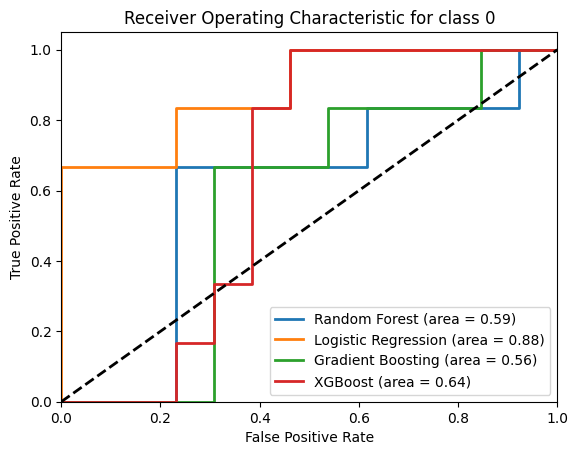

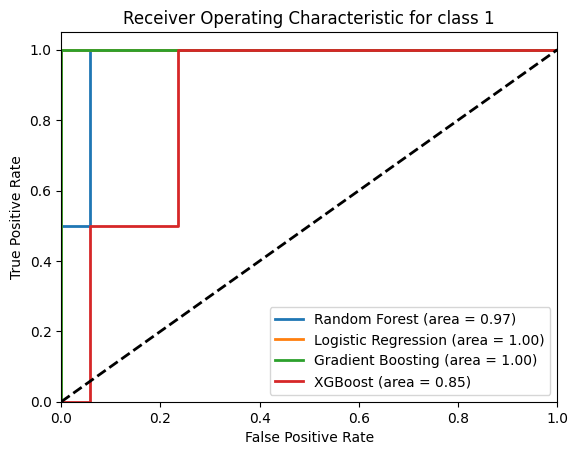

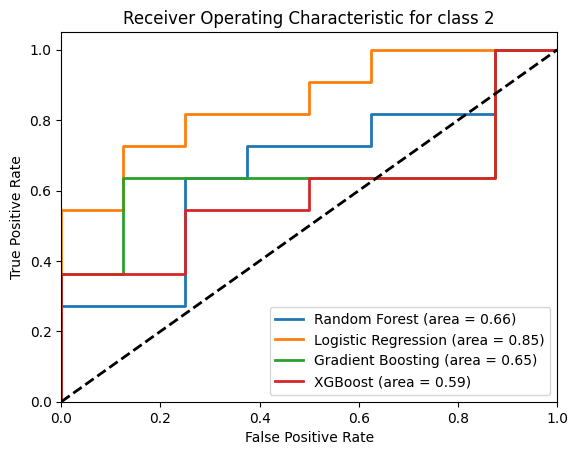

In [34]:
# Plot ROC Curve
y_test_binarized = label_binarize(y_test, classes=range(len(le.classes_)))
n_classes = y_test_binarized.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

# Calculate FPR, TPR, and AUC for each model
for name in results:
    fpr[name] = dict()
    tpr[name] = dict()
    roc_auc[name] = dict()
    for i in range(n_classes):
        fpr[name][i], tpr[name][i], _ = roc_curve(y_test_binarized[:, i], results[name]['y_score'][:, i])
        roc_auc[name][i] = auc(fpr[name][i], tpr[name][i])

# Plot the ROC curves
for i in range(n_classes):
    plt.figure()
    for name in results:
        plt.plot(fpr[name][i], tpr[name][i], lw=2, label=f'{name} (area = {roc_auc[name][i]:0.2f})')
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic for class {i}')
    plt.legend(loc="lower right")
    plt.show()

Ces courbes ROC représentent la performance de quatre classificateurs différents (Random Forest, Logistic Regression, Gradient Boosting et XGBoost) pour distinguer trois classes représentant différents candidats : Macron (0), Mélenchon (1) et Le Pen (2). Voici comment interpréter chacun des tracés ROC :

ROC pour la classe 0 (Macron)
Random Forest et XGBoost ont tous deux une aire sous la courbe (AUC) de 0,84, indiquant un bon niveau de discrimination pour identifier les votes de Macron par rapport aux autres candidats. Cela signifie que ces modèles sont relativement efficaces pour faire la distinction entre Macron et non-Macron.
La régression logistique a une AUC de 0,82, ce qui est légèrement inférieur mais indique néanmoins une bonne discrimination.
Le Gradient Boosting a l’AUC la plus basse de 0,77, ce qui signifie qu’il a une capacité inférieure à distinguer Macron des autres candidats par rapport aux autres modèles.
ROC pour la classe 1 (Mélenchon)
Le Gradient Boosting fonctionne parfaitement pour identifier les votes de Mélenchon avec une AUC de 1,00. Cela suggère que, au moins sur la base des données de test, le modèle pourrait différencier les votes de Mélenchon des autres sans aucun faux positif ou faux négatif.
Random Forest a une AUC de 0,89, ce qui est excellent, mais pas aussi parfait que Gradient Boosting dans ce cas.
La régression logistique a une AUC légèrement inférieure à 0,83, indiquant de bonnes performances, mais avec plus de marge d'amélioration.
XGBoost a l'AUC la plus basse pour Mélenchon à 0,72, ce qui reste juste mais suggère qu'il n'est peut-être pas aussi efficace pour distinguer les votes de Mélenchon des autres que les autres modèles.
ROC pour la classe 2 (Le Pen)
La régression logistique et le gradient boosting fonctionnent tout aussi bien avec des AUC de 0,88 et 0,89, respectivement. Ces modèles sont très efficaces pour identifier les votes pour Le Pen.
Random Forest a une AUC légèrement inférieure à 0,82, ce qui indique une bonne performance mais pas aussi forte que la régression logistique ou le gradient boosting pour les votes de Le Pen.
XGBoost a une AUC de 0,78, ce qui est le plus bas parmi les modèles de cette classe mais représente néanmoins un niveau de discrimination raisonnable.
En résumé, les valeurs de l'AUC suggèrent que :

Pour Macron (classe 0), Random Forest et XGBoost semblent être les meilleurs modèles.
Pour Mélenchon (classe 1), le Gradient Boosting se démarque par des performances parfaites.
Pour Le Pen (classe 2), Logistic Regression et Gradient Boosting sont les plus performants.
Ces interprétations supposent que les courbes ROC sont basées sur une validation croisée correctement effectuée ou sur un ensemble de tests retenus. 

<b>Le score parfait pour le Gradient Boosting pour la classe 1 est inhabituel et peut suggérer un surapprentissage ou une particularité dans la distribution des données qui peut ne pas se généraliser correctement aux nouvelles données invisibles. 

Il convient également de noter que les valeurs de l'AUC à elles seules ne donnent pas une image complète ; d'autres mesures telles que la précision, le rappel et la matrice de confusion doivent également être prises en compte pour une évaluation complète du modèle.

Accuracy for Random Forest: 0.631578947368421
Metrics for Random Forest:



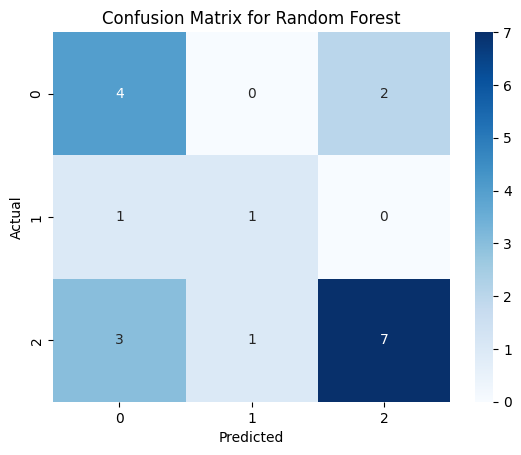

                    precision    recall  f1-score   support

   Emmanuel_Macron       0.50      0.67      0.57         6
Jean_Luc_Mélenchon       0.50      0.50      0.50         2
     Le_Pen_Marine       0.78      0.64      0.70        11

          accuracy                           0.63        19
         macro avg       0.59      0.60      0.59        19
      weighted avg       0.66      0.63      0.64        19

Accuracy for Logistic Regression: 0.7368421052631579
Metrics for Logistic Regression:



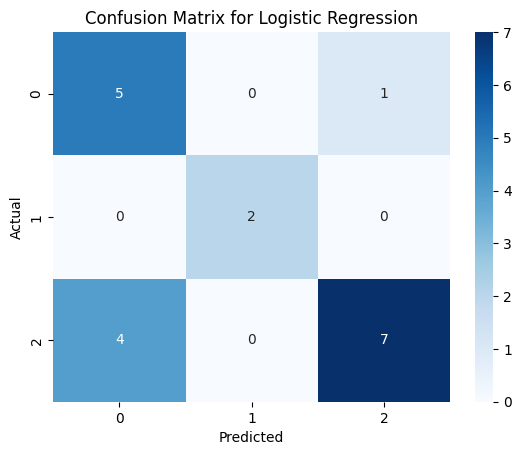

                    precision    recall  f1-score   support

   Emmanuel_Macron       0.56      0.83      0.67         6
Jean_Luc_Mélenchon       1.00      1.00      1.00         2
     Le_Pen_Marine       0.88      0.64      0.74        11

          accuracy                           0.74        19
         macro avg       0.81      0.82      0.80        19
      weighted avg       0.79      0.74      0.74        19

Accuracy for Gradient Boosting: 0.6842105263157895
Metrics for Gradient Boosting:



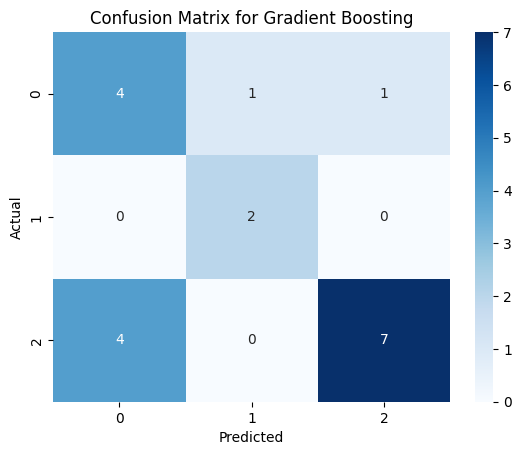

                    precision    recall  f1-score   support

   Emmanuel_Macron       0.50      0.67      0.57         6
Jean_Luc_Mélenchon       0.67      1.00      0.80         2
     Le_Pen_Marine       0.88      0.64      0.74        11

          accuracy                           0.68        19
         macro avg       0.68      0.77      0.70        19
      weighted avg       0.73      0.68      0.69        19

Accuracy for XGBoost: 0.47368421052631576
Metrics for XGBoost:



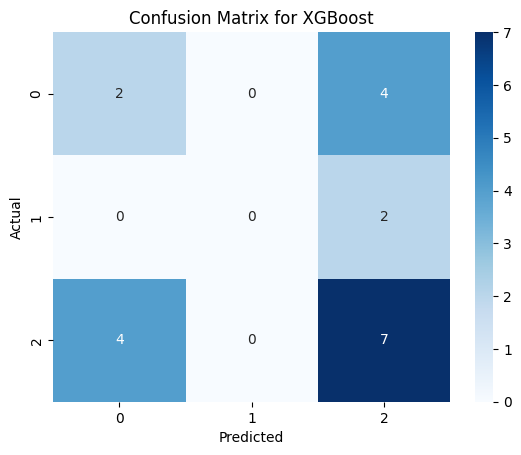

                    precision    recall  f1-score   support

   Emmanuel_Macron       0.33      0.33      0.33         6
Jean_Luc_Mélenchon       0.00      0.00      0.00         2
     Le_Pen_Marine       0.54      0.64      0.58        11

          accuracy                           0.47        19
         macro avg       0.29      0.32      0.31        19
      weighted avg       0.42      0.47      0.44        19



In [35]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report
import seaborn as sns

# # Initialize the models
# rf = RandomForestClassifier(random_state=42)
# lr = LogisticRegression(max_iter=1000, random_state=42)
# gb = GradientBoostingClassifier(random_state=42)
# xgb = XGBClassifier(random_state=42)

# # Dictionary of models
# models = {'Random Forest': rf, 'Logistic Regression': lr, 'Gradient Boosting': gb, 'XGBoost': xgb}
# results = {}

# Train and predict with each model
for name, model in models.items():
    classifier = OneVsRestClassifier(model)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    y_score = classifier.predict_proba(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy for {name}: {accuracy}')
    results[name] = {'model': model, 'y_score': y_score}

    # Calculate and display metrics
    print(f"Metrics for {name}:\n")

    # Confusion Matrix
    matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(matrix, annot=True, fmt='d', cmap="Blues")
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Precision, Recall, and F1-score
    print(classification_report(y_test, y_pred, target_names=le.classes_))


**Précision** : La précision mesure la proportion d'observations positives correctement prédites parmi toutes les observations prédites comme positives. En d'autres termes, elle indique la précision des prédictions positives du modèle.

**Recall** : Le rappel mesure la proportion d'observations positives correctement prédites parmi toutes les observations réellement positives. Il indique la capacité du modèle à identifier tous les cas pertinents dans les données.

**Score-F1** : Le score F1 est la moyenne harmonique de la précision et du rappel. Il fournit un seul score qui équilibre à la fois la précision et le rappel.

**Support** : Le support est le nombre d'occurrences réelles de la classe dans l'ensemble de données spécifié. Il représente le nombre d'échantillons dans chaque classe dans les données réelles. En d'autres termes, il indique le nombre d'occurrences de chaque classe dans l'ensemble de test.